### Individual Homework

#### Enter your name here:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Analysis of movies IMDB dataset**

We will look at a ***subset*** sample of movies, taken from the [Kaggle IMDB 5000 movie dataset](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset)

In [2]:
movies = pd.read_csv('../Data/movies.csv')
movies

,title,genre,director,year,duration,gross,budget,cast_facebook_likes,votes,reviews,rating
0,Avatar,Action,James Cameron,2009,178,760505847,237000000,4834,886204,3777,7.9
1,Titanic,Drama,James Cameron,1997,194,658672302,200000000,45223,793059,2843,7.7
2,Jurassic World,Action,Colin Trevorrow,2015,124,652177271,150000000,8458,418214,1934,7.0
3,The Avengers,Action,Joss Whedon,2012,173,623279547,220000000,87697,995415,2425,8.1
4,The Dark Knight,Action,Christopher Nolan,2008,152,533316061,185000000,57802,1676169,5312,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2956,Locker 13,Thriller,Bruce Dellis,2014,95,2468,300000,2048,241,15,4.8
2957,The Ghastly Love of Johnny X,Comedy,Paul Bunnell,2012,106,2436,2000000,1611,344,113,5.7
2958,Detention of the Dead,Comedy,Alex Craig Mann,2012,87,1332,500000,2251,2038,49,4.6
2959,The Trials of Darryl Hunt,Crime,Ricki Stern,2006,106,1111,200000,2,771,21,7.7


Besides the obvious variables of `title`, `genre`, `director`, `year`, and `duration`, the rest of the variables are as follows:

-   `gross` : The gross earnings in the US box office, not adjusted for inflation
-   `budget`: The movie's budget
-   `cast_facebook_likes`: the number of facebook likes cast memebrs received
-   `votes`: the number of people who voted for (or rated) the movie in IMDB
-   `reviews`: the number of reviews for that movie
-   `rating`: IMDB average rating

**Produce a table with the count of movies by genre, ranked in descending order**


In [3]:
genre_counts =(
    movies["genre"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "genre", "genre": "movie_count"})
)
genre_counts


,movie_count,count
0,Comedy,848
1,Action,738
2,Drama,498
3,Adventure,288
4,Crime,202
5,Biography,135
6,Horror,131
7,Animation,35
8,Fantasy,28
9,Documentary,25


**Produce a table with the average gross earning and budget (`gross` and `budget`) by genre. Calculate a variable `return_on_budget` which shows how many \$ did a movie make at the box office for each \$ of its budget. Ranked genres by this `return_on_budget` in descending order**

In [4]:
genre_avg =(
    movies.groupby("genre")[["gross", "budget"]]
    .mean()
    .reset_index()
)

genre_avg["return_on_budget"] = genre_avg["gross"] / genre_avg["budget"]

genre_avg = genre_avg.sort_values("return_on_budget", ascending=False).reset_index(drop=True)

genre_avg



,genre,gross,budget,return_on_budget
0,Musical,9.208400e+07,3.189500e+06,28.870983
1,Family,1.491605e+08,1.483333e+07,10.055763
2,Western,2.082188e+07,3.465000e+06,6.009202
3,Documentary,1.735397e+07,5.887852e+06,2.947420
4,Horror,3.771374e+07,1.350492e+07,2.792593
5,Fantasy,4.240884e+07,1.758214e+07,2.412040
6,Comedy,4.263055e+07,2.444632e+07,1.743843
7,Mystery,6.753302e+07,3.921875e+07,1.721958
8,Animation,9.843379e+07,6.170143e+07,1.595324
9,Biography,4.520181e+07,2.854370e+07,1.583600


**Produce a table that shows the top 15 directors who have created the highest gross revenue in the box office. Don't just show the total gross amount, but also the mean, median, and standard deviation per director**

In [14]:
director_stats =(
    movies.groupby("director")["gross"]
    .agg(
        total_gross="sum",
        mean_gross="mean",
        median_gross="median",
        std_gross="std"
    )
)

director_stats = director_stats.sort_values(by="total_gross", ascending=False)

top15_directors = director_stats.head(15)

top15_directors


,total_gross,mean_gross,median_gross,std_gross
director,,,,
Steven Spielberg,4014061704,1.745244e+08,164435221.0,1.014211e+08
Michael Bay,2231242537,1.716340e+08,138396624.0,1.271616e+08
Tim Burton,2071275480,1.294547e+08,76519172.0,1.087269e+08
Sam Raimi,2014600898,2.014601e+08,234903076.0,1.621266e+08
James Cameron,1909725910,3.182877e+08,175562880.5,3.091713e+08
Christopher Nolan,1813227576,2.266534e+08,196667606.5,1.872241e+08
George Lucas,1741418480,3.482837e+08,380262555.0,1.461939e+08
Robert Zemeckis,1619309108,1.245622e+08,100853835.0,9.130028e+07
Clint Eastwood,1378321100,7.254322e+07,46700000.0,7.548741e+07


**Produce a table that describes how ratings are distributed by genre. We don't want just the mean, but also, min, max, median, SD and some kind of a histogram or density graph that visually shows how ratings are distributed.**

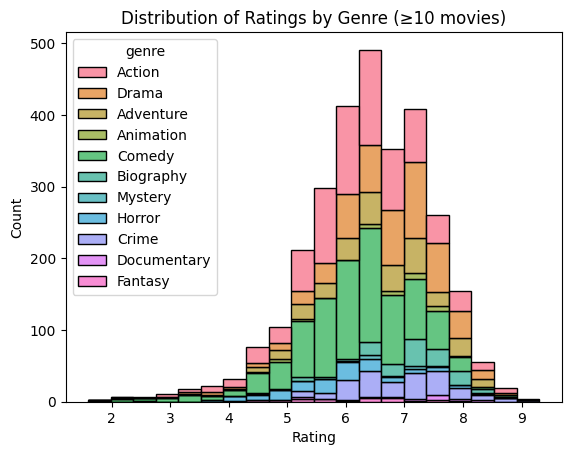

In [15]:
rating_stats =(
    movies.groupby("genre")["rating"]
    .agg(
        mean_rating="mean",
        min_rating="min",
        max_rating="max",
        median_rating="median",
        std_rating="std"
    )
)

# Only genres with at least 10 movies..
valid_genres = (
    movies.groupby("genre")["rating"]
    .count()
    .loc[lambda x: x >= 10]
    .index
)

filtered = movies[movies["genre"].isin(valid_genres)]

sns.histplot(
    data=filtered,
    x="rating",
    hue="genre",
    bins=20,
    multiple="stack"
)

plt.title("Distribution of Ratings by Genre (≥10 movies)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

**Challenge - Produce a table of your own choosing, something you think is important/interesting to have data for, justify your result by writting a 2 sentence explanation/interpretation of the result.**

In [ ]:
# Table: Average cast facebook likes per genre
cast_popularity = (
    movies.groupby("genre")["cast_facebook_likes"]
    .agg(["count", "mean", "median", "std"])
    .sort_values("mean", ascending=False)
    .reset_index()
)

cast_popularity

#Genres like Biography, Action, and Adventure show higher mean cast popularity, suggesting that well-known actors are more frequently associated with these genres. However, the large standard deviations indicate big variability, meaning not all movies within a genre rely equally on star power


,genre,count,mean,median,std
0,Biography,135,15278.385185,7243.0,17954.819976
1,Action,738,14596.607046,8534.0,18826.491233
2,Adventure,288,13927.361111,4955.0,17702.779809
3,Crime,202,13457.792079,11616.0,14412.481908
4,Animation,35,12496.657143,4774.0,18116.361372
5,Mystery,16,12088.875000,7872.5,11596.791809
6,Drama,498,11897.487952,4331.5,14696.220125
7,Comedy,848,10755.186321,4207.0,25609.475348
8,Western,2,8640.500000,8640.5,12117.688909
9,Horror,131,8498.748092,2517.0,29952.041039


#### Use visualisation to answer the following questions

**Examine the relationship between `gross` and `cast_facebook_likes`. Produce a scatterplot and write one sentence discussing whether the number of facebook likes that the cast has received is likely to be a good predictor of how much money a movie will make at the box office. What variable are you going to map to the Y- and X- axes?**

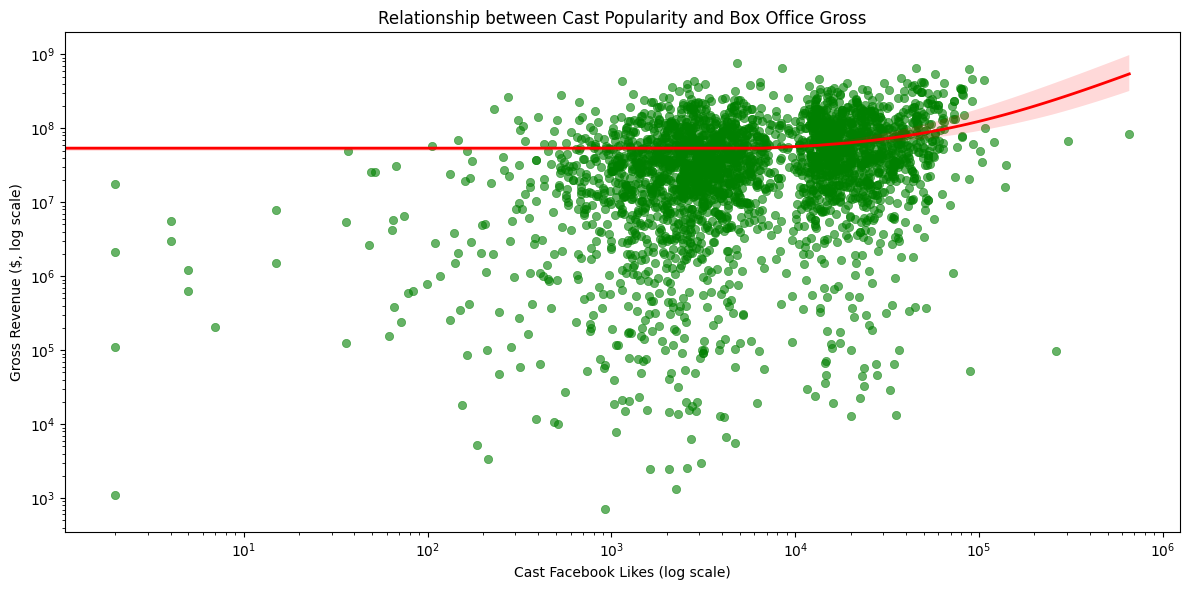

In [9]:
plt.figure(figsize=(12,6))

sns.scatterplot(
    data=movies,
    x="cast_facebook_likes",
    y="gross",
    alpha=0.6,
    edgecolor=None,
    color="green"
)

sns.regplot(
    data=movies,
    x="cast_facebook_likes",
    y="gross",
    scatter=False,
    color="red",
    line_kws={"linewidth": 2}
)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Cast Facebook Likes (log scale)")
plt.ylabel("Gross Revenue ($, log scale)")
plt.title("Relationship between Cast Popularity and Box Office Gross")
plt.tight_layout()
plt.show()

#The scatterplot suggests a weak positive relationship between cast Facebook likes and box office gross: 
#although movies with highly popular casts can achieve higher revenues, the wide dispersion of points indicates that cast popularity alone is not a strong predictor of box office success.


**Examine the relationship between `gross` and `budget`. Produce a scatterplot and write one sentence discussing whether budget is likely to be a good predictor of how much money a movie will make at the box office.**

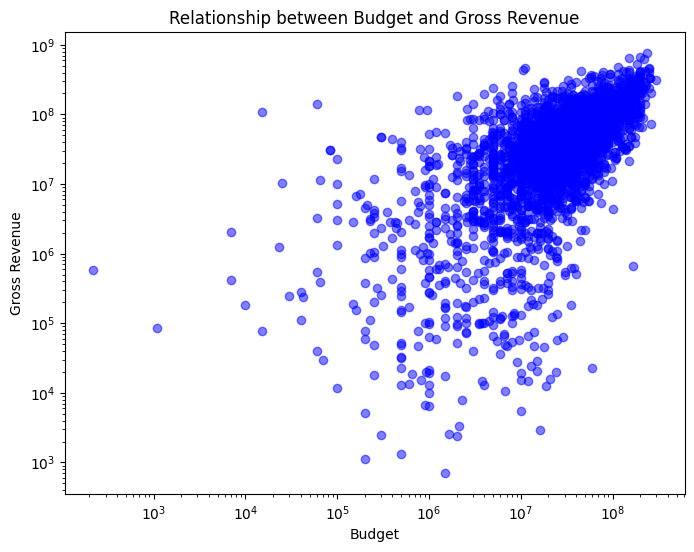

In [3]:

plt.figure(figsize=(8,6))
plt.scatter(movies["budget"], movies["gross"], alpha=0.5, color="blue")
plt.xlabel("Budget")
plt.ylabel("Gross Revenue")
plt.title("Relationship between Budget and Gross Revenue")
plt.xscale("log")
plt.yscale("log")
plt.show()

#Budget appears to be a fairly good predictor of box office revenue, as higher-budget films generally earn more, though the wide spread shows that a large budget does not guarantee high revenue.

**Examine the relationship between `gross` and `rating`. Produce a scatterplot, faceted by `genre` and discuss whether IMDB ratings are likely to be a good predictor of how much money a movie will make at the box office. Is there anything strange in this dataset?**

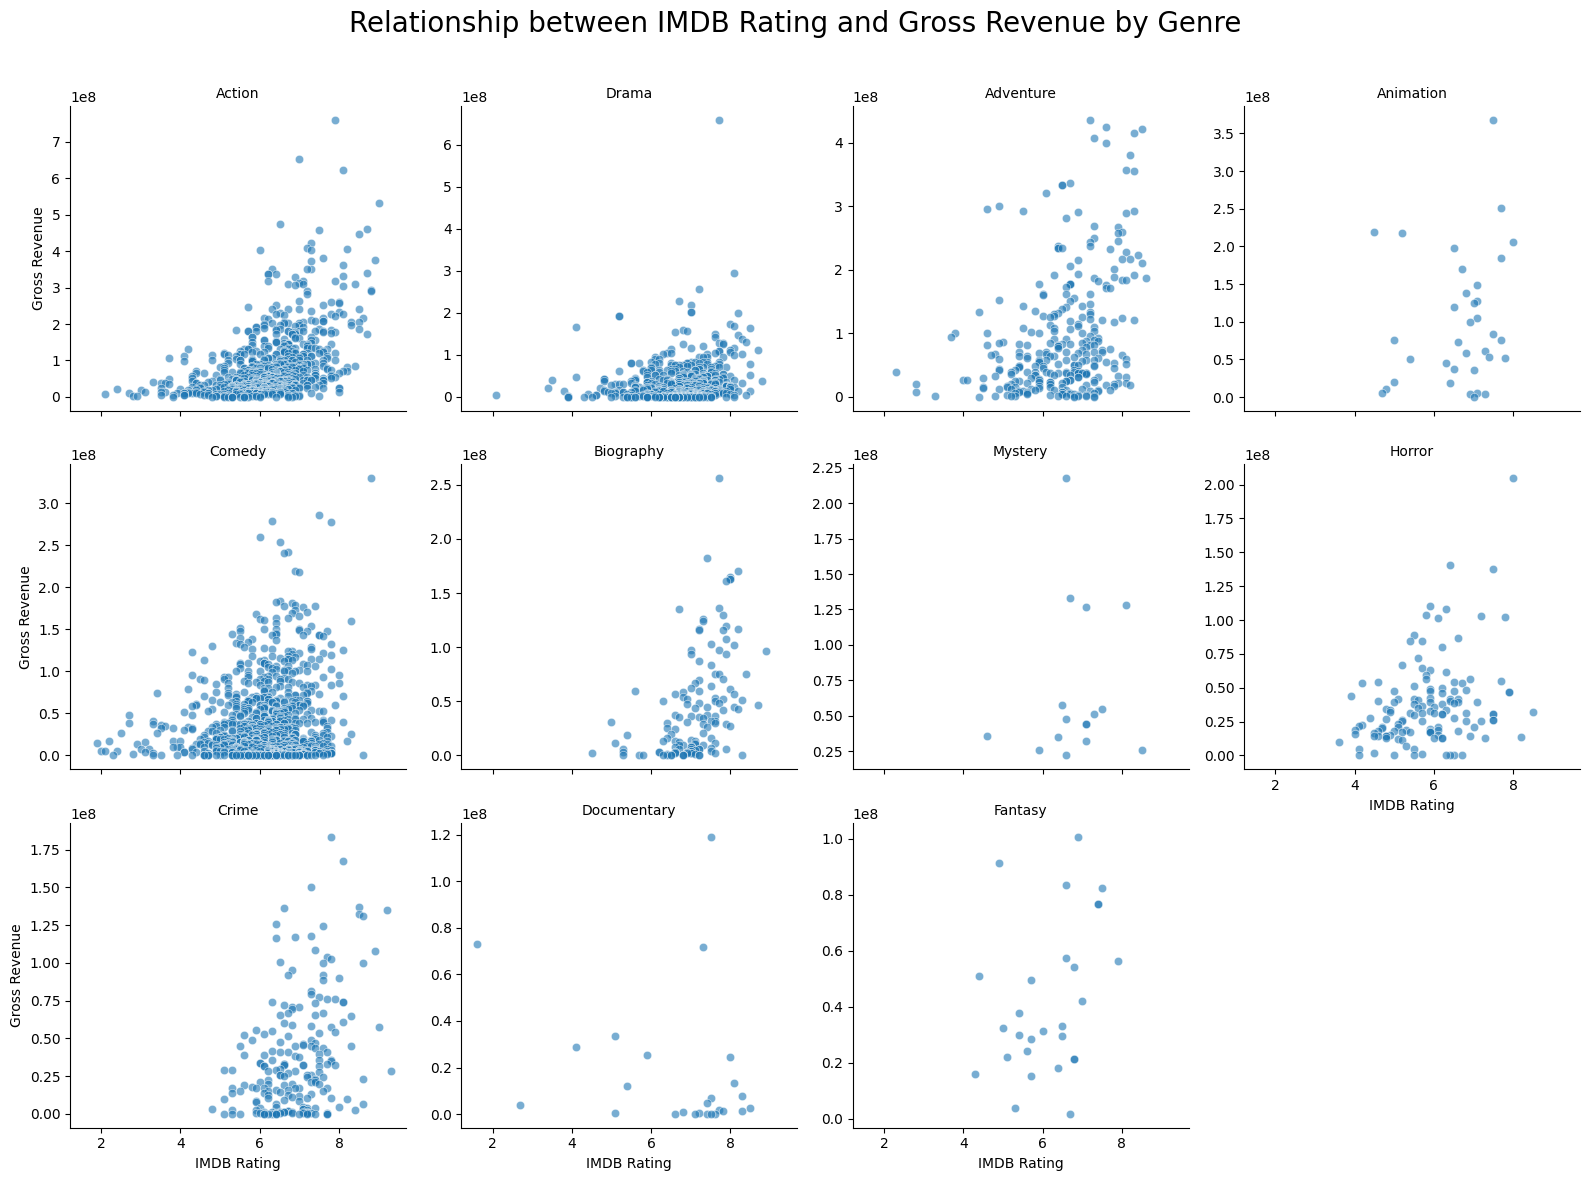

In [17]:
valid_genres = (
    movies.groupby("genre")["gross"]
    .count()
    .loc[lambda x: x >= 10]
    .index
)

filtered = movies[movies["genre"].isin(valid_genres)]

g = sns.FacetGrid(filtered, col="genre", col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.scatterplot, x="rating", y="gross", alpha=0.6)
g.set_axis_labels("IMDB Rating", "Gross Revenue")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Relationship between IMDB Rating and Gross Revenue by Genre", fontsize=20)
plt.subplots_adjust(top=0.9) 
plt.show()

#IMDB ratings do not seem to strongly predict box office revenue, since many mid-rated movies still generate high earnings, especially in Action, Adventure, and Comedy. The Animation genre looks strange, with ratings clustered mostly at the extremes rather than spread evenly. 
# This suggests that factors beyond ratings, such as budget or franchise popularity, drive revenue.

**Challenge - Produce a visualisation of your choosing, something you think is important to explore/investigate visually. Do make it a comprehensive graph and not a single histogram or density plot. Make it publication ready, label your axes, give it a title, choose colouring options, appropirately formatted text etc.**

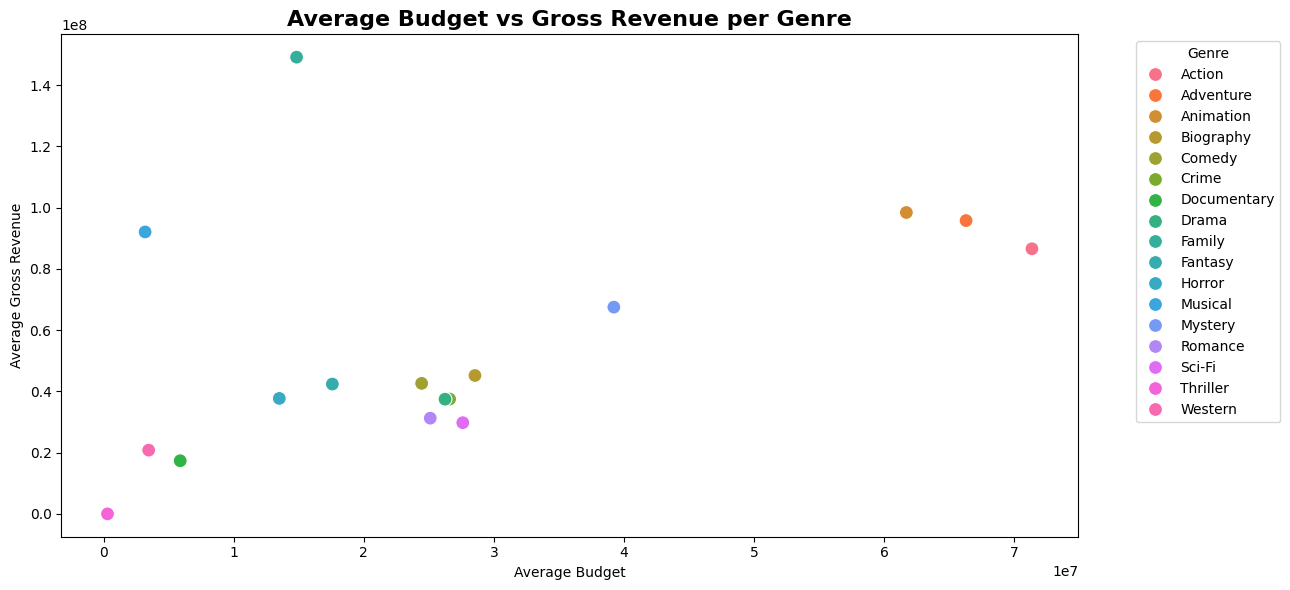

In [12]:
# Regrouper par genre
df = movies.groupby("genre")[["budget", "gross"]].mean().reset_index()

plt.figure(figsize=(13,6))
sns.scatterplot(data=df, x="budget", y="gross", hue="genre", s=100)

plt.xlabel("Average Budget")
plt.ylabel("Average Gross Revenue")
plt.title("Average Budget vs Gross Revenue per Genre", fontsize=16, fontweight="bold")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



### Deliverables

Poduce a clean, stand-alone notebook (or HTML export) with:

All tables/plots properly labeled

Brief interpretations where requested

Upload final HTML/Notebook.